# Description

Runs gaussian mixture model on the umap version of the data.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

3

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=3
env: OPEN_BLAS_NUM_THREADS=3
env: NUMEXPR_NUM_THREADS=3
env: OMP_NUM_THREADS=3


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
INITIAL_RANDOM_STATE = 80000

## Input data

In [6]:
INPUT_SUBSET = "umap"

In [7]:
INPUT_STEM = "z_score_std-projection-smultixcan-efo_partial-mashr-zscores"

In [8]:
DR_OPTIONS = {
    "n_components": 50,
    "metric": "euclidean",
    "n_neighbors": 15,
    "random_state": 0,
}

In [9]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    generate_result_set_name(
        DR_OPTIONS, prefix=f"{INPUT_SUBSET}-{INPUT_STEM}-", suffix=".pkl"
    ),
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0.pkl')

'umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0'

## Clustering

In [10]:
from sklearn.mixture import GaussianMixture

In [11]:
CLUSTERING_ATTRIBUTES_TO_SAVE = ["n_clusters"]

In [12]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_MIN"] = 2
CLUSTERING_OPTIONS["K_MAX"] = 60  # sqrt(3749)
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["N_INIT"] = 10
CLUSTERING_OPTIONS["COVARIANCE_TYPE"] = "full"

display(CLUSTERING_OPTIONS)

{'K_MIN': 2,
 'K_MAX': 60,
 'N_REPS_PER_K': 5,
 'N_INIT': 10,
 'COVARIANCE_TYPE': 'full'}

In [13]:
CLUSTERERS = {}

idx = 0
random_state = INITIAL_RANDOM_STATE

for k in range(CLUSTERING_OPTIONS["K_MIN"], CLUSTERING_OPTIONS["K_MAX"] + 1):
    for i in range(CLUSTERING_OPTIONS["N_REPS_PER_K"]):
        clus = GaussianMixture(
            n_components=k,
            n_init=CLUSTERING_OPTIONS["N_INIT"],
            covariance_type=CLUSTERING_OPTIONS["COVARIANCE_TYPE"],
            random_state=random_state,
        )

        method_name = type(clus).__name__
        CLUSTERERS[f"{method_name} #{idx}"] = clus

        random_state = random_state + 1
        idx = idx + 1

In [14]:
display(len(CLUSTERERS))

295

In [15]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('GaussianMixture #0',
 GaussianMixture(n_components=2, n_init=10, random_state=80000))

('GaussianMixture #1',
 GaussianMixture(n_components=2, n_init=10, random_state=80001))

In [16]:
clustering_method_name = method_name
display(clustering_method_name)

'GaussianMixture'

## Output directory

In [17]:
# output dir for this notebook
RESULTS_DIR = Path(
    conf.RESULTS["CLUSTERING_RUNS_DIR"],
    f"{INPUT_SUBSET}-{INPUT_STEM}",
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores')

# Load input file

In [18]:
data = pd.read_pickle(input_filepath)

In [19]:
data.shape

(3749, 50)

In [20]:
data.head()

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5,UMAP6,UMAP7,UMAP8,UMAP9,UMAP10,...,UMAP41,UMAP42,UMAP43,UMAP44,UMAP45,UMAP46,UMAP47,UMAP48,UMAP49,UMAP50
100001_raw-Food_weight,11.531590,10.773390,10.551500,5.689103,12.646474,8.795625,2.365859,-3.382425,1.458605,14.236823,...,2.214731,9.304909,3.359118,5.211676,1.265622,2.058685,1.291174,1.565621,7.317275,9.037535
100002_raw-Energy,11.554761,10.753816,10.548004,5.710800,12.674987,8.787647,2.379787,-3.339913,1.442655,14.196218,...,2.237087,9.270699,3.383440,5.185328,1.257113,2.057439,1.290686,1.557209,7.297037,9.009866
100003_raw-Protein,11.519615,10.786408,10.540249,5.687959,12.628188,8.789925,2.368370,-3.390937,1.464806,14.233623,...,2.216162,9.314158,3.350708,5.226166,1.267382,2.051692,1.305047,1.558942,7.307035,9.042575
100004_raw-Fat,11.515584,10.756584,10.570711,5.697041,12.661936,8.787330,2.396913,-3.351611,1.435632,14.221588,...,2.214707,9.273252,3.383349,5.220068,1.270067,2.065669,1.281447,1.578588,7.332527,9.005523
100005_raw-Carbohydrate,11.528723,10.762026,10.566773,5.698555,12.671127,8.791903,2.394764,-3.354370,1.442259,14.226301,...,2.216362,9.275563,3.383139,5.216354,1.269187,2.063429,1.280020,1.577227,7.335059,9.009464


In [21]:
assert not data.isna().any().any()

# Clustering

## Generate ensemble

In [22]:
from clustering.ensembles.utils import generate_ensemble

In [23]:
ensemble = generate_ensemble(
    data,
    CLUSTERERS,
    attributes=CLUSTERING_ATTRIBUTES_TO_SAVE,
)

  0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 1/295 [00:00<04:17,  1.14it/s]

  1%|          | 2/295 [00:01<04:09,  1.17it/s]

  1%|          | 3/295 [00:02<04:16,  1.14it/s]

  1%|▏         | 4/295 [00:03<04:03,  1.20it/s]

  2%|▏         | 5/295 [00:04<04:11,  1.15it/s]

  2%|▏         | 6/295 [00:06<05:30,  1.14s/it]

  2%|▏         | 7/295 [00:07<06:14,  1.30s/it]

  3%|▎         | 8/295 [00:09<07:05,  1.48s/it]

  3%|▎         | 9/295 [00:11<07:39,  1.61s/it]

  3%|▎         | 10/295 [00:13<07:36,  1.60s/it]

  4%|▎         | 11/295 [00:17<10:52,  2.30s/it]

  4%|▍         | 12/295 [00:19<11:32,  2.45s/it]

  4%|▍         | 13/295 [00:22<11:34,  2.46s/it]

  5%|▍         | 14/295 [00:25<12:09,  2.60s/it]

  5%|▌         | 15/295 [00:27<11:52,  2.55s/it]

  5%|▌         | 16/295 [00:31<13:35,  2.92s/it]

  6%|▌         | 17/295 [00:35<15:20,  3.31s/it]

  6%|▌         | 18/295 [00:39<15:42,  3.40s/it]

  6%|▋         | 19/295 [00:42<15:24,  3.35s/it]

  7%|▋         | 20/295 [00:47<17:57,  3.92s/it]

  7%|▋         | 21/295 [00:53<20:25,  4.47s/it]

  7%|▋         | 22/295 [00:58<20:39,  4.54s/it]

  8%|▊         | 23/295 [01:03<21:17,  4.70s/it]

  8%|▊         | 24/295 [01:08<21:31,  4.77s/it]

  8%|▊         | 25/295 [01:13<22:14,  4.94s/it]

  9%|▉         | 26/295 [01:18<22:34,  5.04s/it]

  9%|▉         | 27/295 [01:23<22:15,  4.98s/it]

  9%|▉         | 28/295 [01:28<21:49,  4.90s/it]

 10%|▉         | 29/295 [01:33<21:21,  4.82s/it]

 10%|█         | 30/295 [01:38<21:43,  4.92s/it]

 11%|█         | 31/295 [01:43<22:38,  5.15s/it]

 11%|█         | 32/295 [01:49<23:06,  5.27s/it]

 11%|█         | 33/295 [01:56<24:52,  5.70s/it]

 12%|█▏        | 34/295 [02:01<24:10,  5.56s/it]

 12%|█▏        | 35/295 [02:08<25:30,  5.89s/it]

 12%|█▏        | 36/295 [02:12<24:11,  5.61s/it]

 13%|█▎        | 37/295 [02:18<24:14,  5.64s/it]

 13%|█▎        | 38/295 [02:24<24:29,  5.72s/it]

 13%|█▎        | 39/295 [02:29<23:51,  5.59s/it]

 14%|█▎        | 40/295 [02:35<23:22,  5.50s/it]

 14%|█▍        | 41/295 [02:41<24:32,  5.80s/it]

 14%|█▍        | 42/295 [02:47<24:50,  5.89s/it]

 15%|█▍        | 43/295 [02:53<24:52,  5.92s/it]

 15%|█▍        | 44/295 [03:00<25:13,  6.03s/it]

 15%|█▌        | 45/295 [03:07<26:36,  6.39s/it]

 16%|█▌        | 46/295 [03:13<26:09,  6.30s/it]

 16%|█▌        | 47/295 [03:20<27:00,  6.53s/it]

 16%|█▋        | 48/295 [03:26<26:08,  6.35s/it]

 17%|█▋        | 49/295 [03:32<25:59,  6.34s/it]

 17%|█▋        | 50/295 [03:38<25:25,  6.23s/it]

 17%|█▋        | 51/295 [03:45<25:58,  6.39s/it]

 18%|█▊        | 52/295 [03:53<27:46,  6.86s/it]

 18%|█▊        | 53/295 [04:00<27:47,  6.89s/it]

 18%|█▊        | 54/295 [04:07<27:36,  6.87s/it]

 19%|█▊        | 55/295 [04:13<27:20,  6.84s/it]

 19%|█▉        | 56/295 [04:20<27:06,  6.80s/it]

 19%|█▉        | 57/295 [04:27<27:10,  6.85s/it]

 20%|█▉        | 58/295 [04:34<27:22,  6.93s/it]

 20%|██        | 59/295 [04:41<26:51,  6.83s/it]

 20%|██        | 60/295 [04:48<26:42,  6.82s/it]

 21%|██        | 61/295 [04:55<26:45,  6.86s/it]

 21%|██        | 62/295 [05:02<27:03,  6.97s/it]

 21%|██▏       | 63/295 [05:11<28:59,  7.50s/it]

 22%|██▏       | 64/295 [05:18<28:37,  7.43s/it]

 22%|██▏       | 65/295 [05:25<28:28,  7.43s/it]

 22%|██▏       | 66/295 [05:33<28:34,  7.49s/it]

 23%|██▎       | 67/295 [05:40<28:25,  7.48s/it]

 23%|██▎       | 68/295 [05:49<29:16,  7.74s/it]

 23%|██▎       | 69/295 [05:56<28:45,  7.64s/it]

 24%|██▎       | 70/295 [06:04<28:26,  7.58s/it]

 24%|██▍       | 71/295 [06:11<28:42,  7.69s/it]

 24%|██▍       | 72/295 [06:19<28:45,  7.74s/it]

 25%|██▍       | 73/295 [06:26<27:58,  7.56s/it]

 25%|██▌       | 74/295 [06:35<28:27,  7.72s/it]

 25%|██▌       | 75/295 [06:43<28:55,  7.89s/it]

 26%|██▌       | 76/295 [06:52<30:03,  8.23s/it]

 26%|██▌       | 77/295 [07:00<29:16,  8.06s/it]

 26%|██▋       | 78/295 [07:07<28:48,  7.96s/it]

 27%|██▋       | 79/295 [07:15<28:44,  7.98s/it]

 27%|██▋       | 80/295 [07:22<27:30,  7.68s/it]

 27%|██▋       | 81/295 [07:31<28:26,  7.97s/it]

 28%|██▊       | 82/295 [07:39<28:16,  7.96s/it]

 28%|██▊       | 83/295 [07:48<29:17,  8.29s/it]

 28%|██▊       | 84/295 [07:56<29:03,  8.26s/it]

 29%|██▉       | 85/295 [08:04<28:35,  8.17s/it]

 29%|██▉       | 86/295 [08:13<28:48,  8.27s/it]

 29%|██▉       | 87/295 [08:21<29:04,  8.39s/it]

 30%|██▉       | 88/295 [08:30<29:34,  8.57s/it]

 30%|███       | 89/295 [08:40<30:25,  8.86s/it]

 31%|███       | 90/295 [08:49<30:20,  8.88s/it]

 31%|███       | 91/295 [08:58<30:21,  8.93s/it]

 31%|███       | 92/295 [09:06<29:35,  8.74s/it]

 32%|███▏      | 93/295 [09:15<29:29,  8.76s/it]

 32%|███▏      | 94/295 [09:23<28:17,  8.45s/it]

 32%|███▏      | 95/295 [09:32<29:19,  8.80s/it]

 33%|███▎      | 96/295 [09:41<29:30,  8.90s/it]

 33%|███▎      | 97/295 [09:51<30:01,  9.10s/it]

 33%|███▎      | 98/295 [10:00<29:43,  9.05s/it]

 34%|███▎      | 99/295 [10:09<29:14,  8.95s/it]

 34%|███▍      | 100/295 [10:18<29:06,  8.95s/it]

 34%|███▍      | 101/295 [10:27<29:42,  9.19s/it]

 35%|███▍      | 102/295 [10:36<29:26,  9.15s/it]

 35%|███▍      | 103/295 [10:45<29:16,  9.15s/it]

 35%|███▌      | 104/295 [10:56<30:27,  9.57s/it]

 36%|███▌      | 105/295 [11:06<30:28,  9.63s/it]

 36%|███▌      | 106/295 [11:15<30:18,  9.62s/it]

 36%|███▋      | 107/295 [11:25<30:26,  9.71s/it]

 37%|███▋      | 108/295 [11:35<29:59,  9.62s/it]

 37%|███▋      | 109/295 [11:45<30:49,  9.94s/it]

 37%|███▋      | 110/295 [11:55<30:41,  9.95s/it]

 38%|███▊      | 111/295 [12:06<31:01, 10.12s/it]

 38%|███▊      | 112/295 [12:15<29:49,  9.78s/it]

 38%|███▊      | 113/295 [12:25<29:54,  9.86s/it]

 39%|███▊      | 114/295 [12:34<29:21,  9.73s/it]

 39%|███▉      | 115/295 [12:45<29:35,  9.87s/it]

 39%|███▉      | 116/295 [12:55<29:45,  9.98s/it]

 40%|███▉      | 117/295 [13:05<29:52, 10.07s/it]

 40%|████      | 118/295 [13:15<29:53, 10.13s/it]

 40%|████      | 119/295 [13:25<29:41, 10.12s/it]

 41%|████      | 120/295 [13:36<30:04, 10.31s/it]

 41%|████      | 121/295 [13:47<30:01, 10.35s/it]

 41%|████▏     | 122/295 [13:57<29:47, 10.33s/it]

 42%|████▏     | 123/295 [14:06<28:55, 10.09s/it]

 42%|████▏     | 124/295 [14:17<28:53, 10.14s/it]

 42%|████▏     | 125/295 [14:27<28:28, 10.05s/it]

 43%|████▎     | 126/295 [14:36<28:09, 10.00s/it]

 43%|████▎     | 127/295 [14:46<27:24,  9.79s/it]

 43%|████▎     | 128/295 [14:56<27:39,  9.94s/it]

 44%|████▎     | 129/295 [15:06<27:52, 10.08s/it]

 44%|████▍     | 130/295 [15:16<27:13,  9.90s/it]

 44%|████▍     | 131/295 [15:28<28:29, 10.42s/it]

 45%|████▍     | 132/295 [15:38<28:13, 10.39s/it]

 45%|████▌     | 133/295 [15:48<27:29, 10.18s/it]

 45%|████▌     | 134/295 [15:58<27:43, 10.33s/it]

 46%|████▌     | 135/295 [16:08<27:13, 10.21s/it]

 46%|████▌     | 136/295 [16:20<28:05, 10.60s/it]

 46%|████▋     | 137/295 [16:30<27:23, 10.40s/it]

 47%|████▋     | 138/295 [16:40<26:54, 10.28s/it]

 47%|████▋     | 139/295 [16:50<26:55, 10.35s/it]

 47%|████▋     | 140/295 [17:01<27:00, 10.45s/it]

 48%|████▊     | 141/295 [17:12<27:42, 10.80s/it]

 48%|████▊     | 142/295 [17:23<27:17, 10.71s/it]

 48%|████▊     | 143/295 [17:34<27:42, 10.94s/it]

 49%|████▉     | 144/295 [17:46<28:02, 11.14s/it]

 49%|████▉     | 145/295 [17:59<29:19, 11.73s/it]

 49%|████▉     | 146/295 [18:10<28:45, 11.58s/it]

 50%|████▉     | 147/295 [18:21<28:14, 11.45s/it]

 50%|█████     | 148/295 [18:34<28:59, 11.83s/it]

 51%|█████     | 149/295 [18:45<27:51, 11.45s/it]

 51%|█████     | 150/295 [18:55<27:08, 11.23s/it]

 51%|█████     | 151/295 [19:08<27:41, 11.54s/it]

 52%|█████▏    | 152/295 [19:18<26:45, 11.22s/it]

 52%|█████▏    | 153/295 [19:30<26:51, 11.35s/it]

 52%|█████▏    | 154/295 [19:42<26:59, 11.48s/it]

 53%|█████▎    | 155/295 [19:53<26:27, 11.34s/it]

 53%|█████▎    | 156/295 [20:04<26:05, 11.26s/it]

 53%|█████▎    | 157/295 [20:14<25:16, 10.99s/it]

 54%|█████▎    | 158/295 [20:26<25:46, 11.29s/it]

 54%|█████▍    | 159/295 [20:37<25:12, 11.12s/it]

 54%|█████▍    | 160/295 [20:48<25:06, 11.16s/it]

 55%|█████▍    | 161/295 [21:01<25:59, 11.64s/it]

 55%|█████▍    | 162/295 [21:13<25:49, 11.65s/it]

 55%|█████▌    | 163/295 [21:25<25:58, 11.81s/it]

 56%|█████▌    | 164/295 [21:36<25:39, 11.75s/it]

 56%|█████▌    | 165/295 [21:47<24:54, 11.50s/it]

 56%|█████▋    | 166/295 [21:58<24:24, 11.36s/it]

 57%|█████▋    | 167/295 [22:11<24:55, 11.69s/it]

 57%|█████▋    | 168/295 [22:23<25:08, 11.88s/it]

 57%|█████▋    | 169/295 [22:33<23:44, 11.30s/it]

 58%|█████▊    | 170/295 [22:44<23:30, 11.28s/it]

 58%|█████▊    | 171/295 [22:57<24:12, 11.71s/it]

 58%|█████▊    | 172/295 [23:09<23:58, 11.70s/it]

 59%|█████▊    | 173/295 [23:20<23:37, 11.62s/it]

 59%|█████▉    | 174/295 [23:32<23:35, 11.70s/it]

 59%|█████▉    | 175/295 [23:43<23:00, 11.50s/it]

 60%|█████▉    | 176/295 [23:55<23:07, 11.66s/it]

 60%|██████    | 177/295 [24:07<23:07, 11.76s/it]

 60%|██████    | 178/295 [24:19<22:56, 11.76s/it]

 61%|██████    | 179/295 [24:31<22:48, 11.79s/it]

 61%|██████    | 180/295 [24:43<22:51, 11.92s/it]

 61%|██████▏   | 181/295 [24:54<22:16, 11.72s/it]

 62%|██████▏   | 182/295 [25:08<23:02, 12.23s/it]

 62%|██████▏   | 183/295 [25:21<23:45, 12.73s/it]

 62%|██████▏   | 184/295 [25:35<23:45, 12.84s/it]

 63%|██████▎   | 185/295 [25:47<23:19, 12.73s/it]

 63%|██████▎   | 186/295 [25:59<22:41, 12.49s/it]

 63%|██████▎   | 187/295 [26:12<22:54, 12.73s/it]

 64%|██████▎   | 188/295 [26:25<22:34, 12.66s/it]

 64%|██████▍   | 189/295 [26:37<22:07, 12.52s/it]

 64%|██████▍   | 190/295 [26:49<21:34, 12.33s/it]

 65%|██████▍   | 191/295 [27:02<22:01, 12.71s/it]

 65%|██████▌   | 192/295 [27:15<21:55, 12.77s/it]

 65%|██████▌   | 193/295 [27:28<21:26, 12.61s/it]

 66%|██████▌   | 194/295 [27:41<21:36, 12.84s/it]

 66%|██████▌   | 195/295 [27:53<20:59, 12.60s/it]

 66%|██████▋   | 196/295 [28:06<20:47, 12.60s/it]

 67%|██████▋   | 197/295 [28:20<21:33, 13.20s/it]

 67%|██████▋   | 198/295 [28:32<20:38, 12.76s/it]

 67%|██████▋   | 199/295 [28:44<20:03, 12.54s/it]

 68%|██████▊   | 200/295 [28:57<20:01, 12.64s/it]

 68%|██████▊   | 201/295 [29:09<19:34, 12.50s/it]

 68%|██████▊   | 202/295 [29:22<19:31, 12.60s/it]

 69%|██████▉   | 203/295 [29:34<19:11, 12.52s/it]

 69%|██████▉   | 204/295 [29:48<19:47, 13.05s/it]

 69%|██████▉   | 205/295 [30:00<19:09, 12.77s/it]

 70%|██████▉   | 206/295 [30:14<19:15, 12.98s/it]

 70%|███████   | 207/295 [30:26<18:34, 12.67s/it]

 71%|███████   | 208/295 [30:38<18:20, 12.64s/it]

 71%|███████   | 209/295 [30:51<18:11, 12.69s/it]

 71%|███████   | 210/295 [31:05<18:18, 12.92s/it]

 72%|███████▏  | 211/295 [31:19<18:38, 13.32s/it]

 72%|███████▏  | 212/295 [31:32<18:11, 13.15s/it]

 72%|███████▏  | 213/295 [31:45<18:04, 13.22s/it]

 73%|███████▎  | 214/295 [32:00<18:19, 13.57s/it]

 73%|███████▎  | 215/295 [32:13<18:09, 13.62s/it]

 73%|███████▎  | 216/295 [32:26<17:40, 13.42s/it]

 74%|███████▎  | 217/295 [32:39<17:05, 13.15s/it]

 74%|███████▍  | 218/295 [32:53<17:06, 13.33s/it]

 74%|███████▍  | 219/295 [33:05<16:34, 13.08s/it]

 75%|███████▍  | 220/295 [33:19<16:31, 13.21s/it]

 75%|███████▍  | 221/295 [33:33<16:37, 13.48s/it]

 75%|███████▌  | 222/295 [33:45<15:58, 13.14s/it]

 76%|███████▌  | 223/295 [33:58<15:38, 13.03s/it]

 76%|███████▌  | 224/295 [34:11<15:28, 13.07s/it]

 76%|███████▋  | 225/295 [34:25<15:35, 13.36s/it]

 77%|███████▋  | 226/295 [34:39<15:29, 13.47s/it]

 77%|███████▋  | 227/295 [34:54<15:50, 13.98s/it]

 77%|███████▋  | 228/295 [35:07<15:24, 13.80s/it]

 78%|███████▊  | 229/295 [35:20<14:57, 13.60s/it]

 78%|███████▊  | 230/295 [35:32<14:14, 13.14s/it]

 78%|███████▊  | 231/295 [35:47<14:19, 13.42s/it]

 79%|███████▊  | 232/295 [36:00<14:13, 13.54s/it]

 79%|███████▉  | 233/295 [36:14<13:54, 13.47s/it]

 79%|███████▉  | 234/295 [36:27<13:39, 13.43s/it]

 80%|███████▉  | 235/295 [36:41<13:43, 13.72s/it]

 80%|████████  | 236/295 [36:56<13:43, 13.96s/it]

 80%|████████  | 237/295 [37:10<13:26, 13.90s/it]

 81%|████████  | 238/295 [37:24<13:25, 14.13s/it]

 81%|████████  | 239/295 [37:37<12:53, 13.81s/it]

 81%|████████▏ | 240/295 [37:52<13:00, 14.19s/it]

 82%|████████▏ | 241/295 [38:06<12:27, 13.85s/it]

 82%|████████▏ | 242/295 [38:21<12:32, 14.20s/it]

 82%|████████▏ | 243/295 [38:32<11:37, 13.41s/it]

 83%|████████▎ | 244/295 [38:47<11:39, 13.71s/it]

 83%|████████▎ | 245/295 [39:00<11:26, 13.73s/it]

 83%|████████▎ | 246/295 [39:14<11:17, 13.82s/it]

 84%|████████▎ | 247/295 [39:28<10:56, 13.68s/it]

 84%|████████▍ | 248/295 [39:41<10:43, 13.70s/it]

 84%|████████▍ | 249/295 [39:57<10:52, 14.19s/it]

 85%|████████▍ | 250/295 [40:11<10:33, 14.08s/it]

 85%|████████▌ | 251/295 [40:24<10:15, 13.99s/it]

 85%|████████▌ | 252/295 [40:37<09:47, 13.66s/it]

 86%|████████▌ | 253/295 [40:50<09:23, 13.41s/it]

 86%|████████▌ | 254/295 [41:03<09:02, 13.22s/it]

 86%|████████▋ | 255/295 [41:17<08:54, 13.36s/it]

 87%|████████▋ | 256/295 [41:29<08:35, 13.23s/it]

 87%|████████▋ | 257/295 [41:42<08:13, 12.98s/it]

 87%|████████▋ | 258/295 [41:55<08:06, 13.15s/it]

 88%|████████▊ | 259/295 [42:08<07:45, 12.92s/it]

 88%|████████▊ | 260/295 [42:21<07:39, 13.13s/it]

 88%|████████▊ | 261/295 [42:36<07:37, 13.44s/it]

 89%|████████▉ | 262/295 [42:50<07:38, 13.89s/it]

 89%|████████▉ | 263/295 [43:05<07:29, 14.04s/it]

 89%|████████▉ | 264/295 [43:19<07:12, 13.94s/it]

 90%|████████▉ | 265/295 [43:32<06:52, 13.76s/it]

 90%|█████████ | 266/295 [43:47<06:52, 14.21s/it]

 91%|█████████ | 267/295 [44:01<06:35, 14.12s/it]

 91%|█████████ | 268/295 [44:16<06:27, 14.36s/it]

 91%|█████████ | 269/295 [44:29<05:59, 13.81s/it]

 92%|█████████▏| 270/295 [44:42<05:40, 13.62s/it]

 92%|█████████▏| 271/295 [44:57<05:39, 14.14s/it]

 92%|█████████▏| 272/295 [45:12<05:33, 14.48s/it]

 93%|█████████▎| 273/295 [45:25<05:09, 14.05s/it]

 93%|█████████▎| 274/295 [45:40<04:57, 14.17s/it]

 93%|█████████▎| 275/295 [45:53<04:37, 13.86s/it]

 94%|█████████▎| 276/295 [46:07<04:24, 13.90s/it]

 94%|█████████▍| 277/295 [46:23<04:22, 14.59s/it]

 94%|█████████▍| 278/295 [46:38<04:11, 14.78s/it]

 95%|█████████▍| 279/295 [46:53<03:56, 14.81s/it]

 95%|█████████▍| 280/295 [47:06<03:31, 14.12s/it]

 95%|█████████▌| 281/295 [47:20<03:18, 14.21s/it]

 96%|█████████▌| 282/295 [47:33<03:01, 13.93s/it]

 96%|█████████▌| 283/295 [47:48<02:48, 14.02s/it]

 96%|█████████▋| 284/295 [48:03<02:38, 14.38s/it]

 97%|█████████▋| 285/295 [48:16<02:18, 13.89s/it]

 97%|█████████▋| 286/295 [48:30<02:05, 14.00s/it]

 97%|█████████▋| 287/295 [48:44<01:52, 14.01s/it]

 98%|█████████▊| 288/295 [48:58<01:38, 14.14s/it]

 98%|█████████▊| 289/295 [49:13<01:24, 14.15s/it]

 98%|█████████▊| 290/295 [49:27<01:11, 14.20s/it]

 99%|█████████▊| 291/295 [49:41<00:57, 14.30s/it]

 99%|█████████▉| 292/295 [49:55<00:42, 14.19s/it]

 99%|█████████▉| 293/295 [50:10<00:28, 14.27s/it]

100%|█████████▉| 294/295 [50:23<00:13, 13.93s/it]

100%|██████████| 295/295 [50:38<00:00, 14.20s/it]

100%|██████████| 295/295 [50:38<00:00, 10.30s/it]

In [24]:
# the number should be close to 295 (the number of partitions generated by k-means/spectral clustering)
ensemble.shape

(295, 3)

In [25]:
ensemble.head()

,clusterer_params,partition,n_clusters
clusterer_id,,,
GaussianMixture #0,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
GaussianMixture #1,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
GaussianMixture #2,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
GaussianMixture #3,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
GaussianMixture #4,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2


In [26]:
ensemble["n_clusters"].value_counts().head()

60    5
16    5
28    5
27    5
26    5
Name: n_clusters, dtype: int64

In [27]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    295.000000
mean      31.000000
std       17.058323
min        2.000000
25%       16.000000
50%       31.000000
75%       46.000000
max       60.000000
Name: n_clusters, dtype: float64

## Testing

In [28]:
assert ensemble_stats["min"] > 1

In [29]:
assert not ensemble["n_clusters"].isna().any()

In [30]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [31]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [32]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])

## Add clustering quality measures

In [33]:
from sklearn.metrics import calinski_harabasz_score

In [34]:
ensemble = ensemble.assign(
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x))
)

In [35]:
ensemble.shape

(295, 4)

In [36]:
ensemble.head()

,clusterer_params,partition,n_clusters,ch_score
clusterer_id,,,,
GaussianMixture #0,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,4641.627826
GaussianMixture #1,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,4641.627826
GaussianMixture #2,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,4641.627826
GaussianMixture #3,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,4641.627826
GaussianMixture #4,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,4641.627826


## Save

In [37]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores/GaussianMixture-COVARIANCE_TYPE_full-K_MAX_60-K_MIN_2-N_INIT_10-N_REPS_PER_K_5.pkl')

In [38]:
ensemble.to_pickle(output_filename)

# Cluster quality

In [39]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters"]).mean()
    display(_df)

,ch_score
n_clusters,
2,4641.627826
3,3541.429642
4,2493.208082
5,1968.320366
6,1645.192223
7,1474.195098
8,1407.306977
9,1326.700024
10,1243.197470


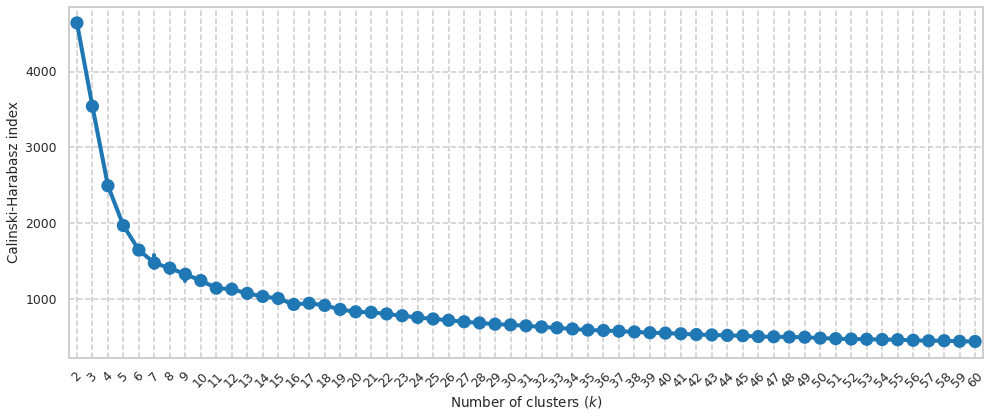

In [40]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score")
    ax.set_ylabel("Calinski-Harabasz index")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Stability

## Group ensemble by n_clusters

In [41]:
parts = ensemble.groupby("n_clusters").apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [42]:
parts.head()

n_clusters
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
4    [[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0,...
5    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
6    [[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0,...
dtype: object

In [43]:
assert np.all(
    [
        parts.loc[k].shape == (CLUSTERING_OPTIONS["N_REPS_PER_K"], data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [44]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist

In [45]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="k"
)

In [46]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

2     1.000000
3     1.000000
4     0.675581
9     0.504749
57    0.496233
58    0.491369
49    0.487037
56    0.483208
53    0.479402
60    0.463773
46    0.460922
24    0.460238
52    0.459956
59    0.459476
48    0.455282
Name: k, dtype: float64

In [47]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)

In [48]:
parts_ari_df.shape

(59, 10)

In [49]:
assert (
    int(
        (CLUSTERING_OPTIONS["N_REPS_PER_K"] * (CLUSTERING_OPTIONS["N_REPS_PER_K"] - 1))
        / 2
    )
    == parts_ari_df.shape[1]
)

In [50]:
parts_ari_df.head()

,0,1,2,3,4,5,6,7,8,9
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.917962,0.481133,0.481133,0.481133,0.464816,0.464816,0.464816,1.000000,1.000000,1.000000
5,0.360144,0.338065,0.393219,0.774634,0.623512,0.444259,0.416145,0.351447,0.379220,0.427831
6,0.410096,0.341536,0.410132,0.277000,0.201221,0.369117,0.328628,0.206127,0.389345,0.315021


## Save

In [51]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-stability-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores/GaussianMixture-stability-COVARIANCE_TYPE_full-K_MAX_60-K_MIN_2-N_INIT_10-N_REPS_PER_K_5.pkl')

In [52]:
parts_ari_df.to_pickle(output_filename)

## Stability plot

In [53]:
parts_ari_df_plot = (
    parts_ari_df.stack()
    .reset_index()
    .rename(columns={"level_0": "k", "level_1": "idx", 0: "ari"})
)

In [54]:
parts_ari_df_plot.dtypes

k        int64
idx      int64
ari    float64
dtype: object

In [55]:
parts_ari_df_plot.head()

,k,idx,ari
0,2,0,1.0
1,2,1,1.0
2,2,2,1.0
3,2,3,1.0
4,2,4,1.0


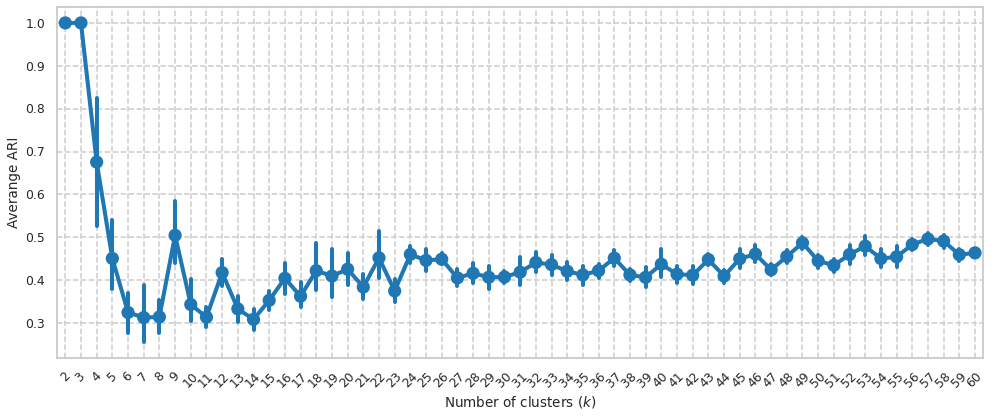

In [56]:
# with sns.axes_style('whitegrid', {'grid.linestyle': '--'}):
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="k", y="ari")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #     ax.set_ylim(0.0, 1.0)
    #     ax.set_xlim(CLUSTERING_OPTIONS['K_MIN'], CLUSTERING_OPTIONS['K_MAX'])
    plt.grid(True)
    plt.tight_layout()